 ## <a id='0'> **1. ANÁLISIS EXPLORATORIO DE DATOS (EDA) - NFL 🏈** </a>
##### *THE BRIDGE - DATA_SCIENCE 2023*
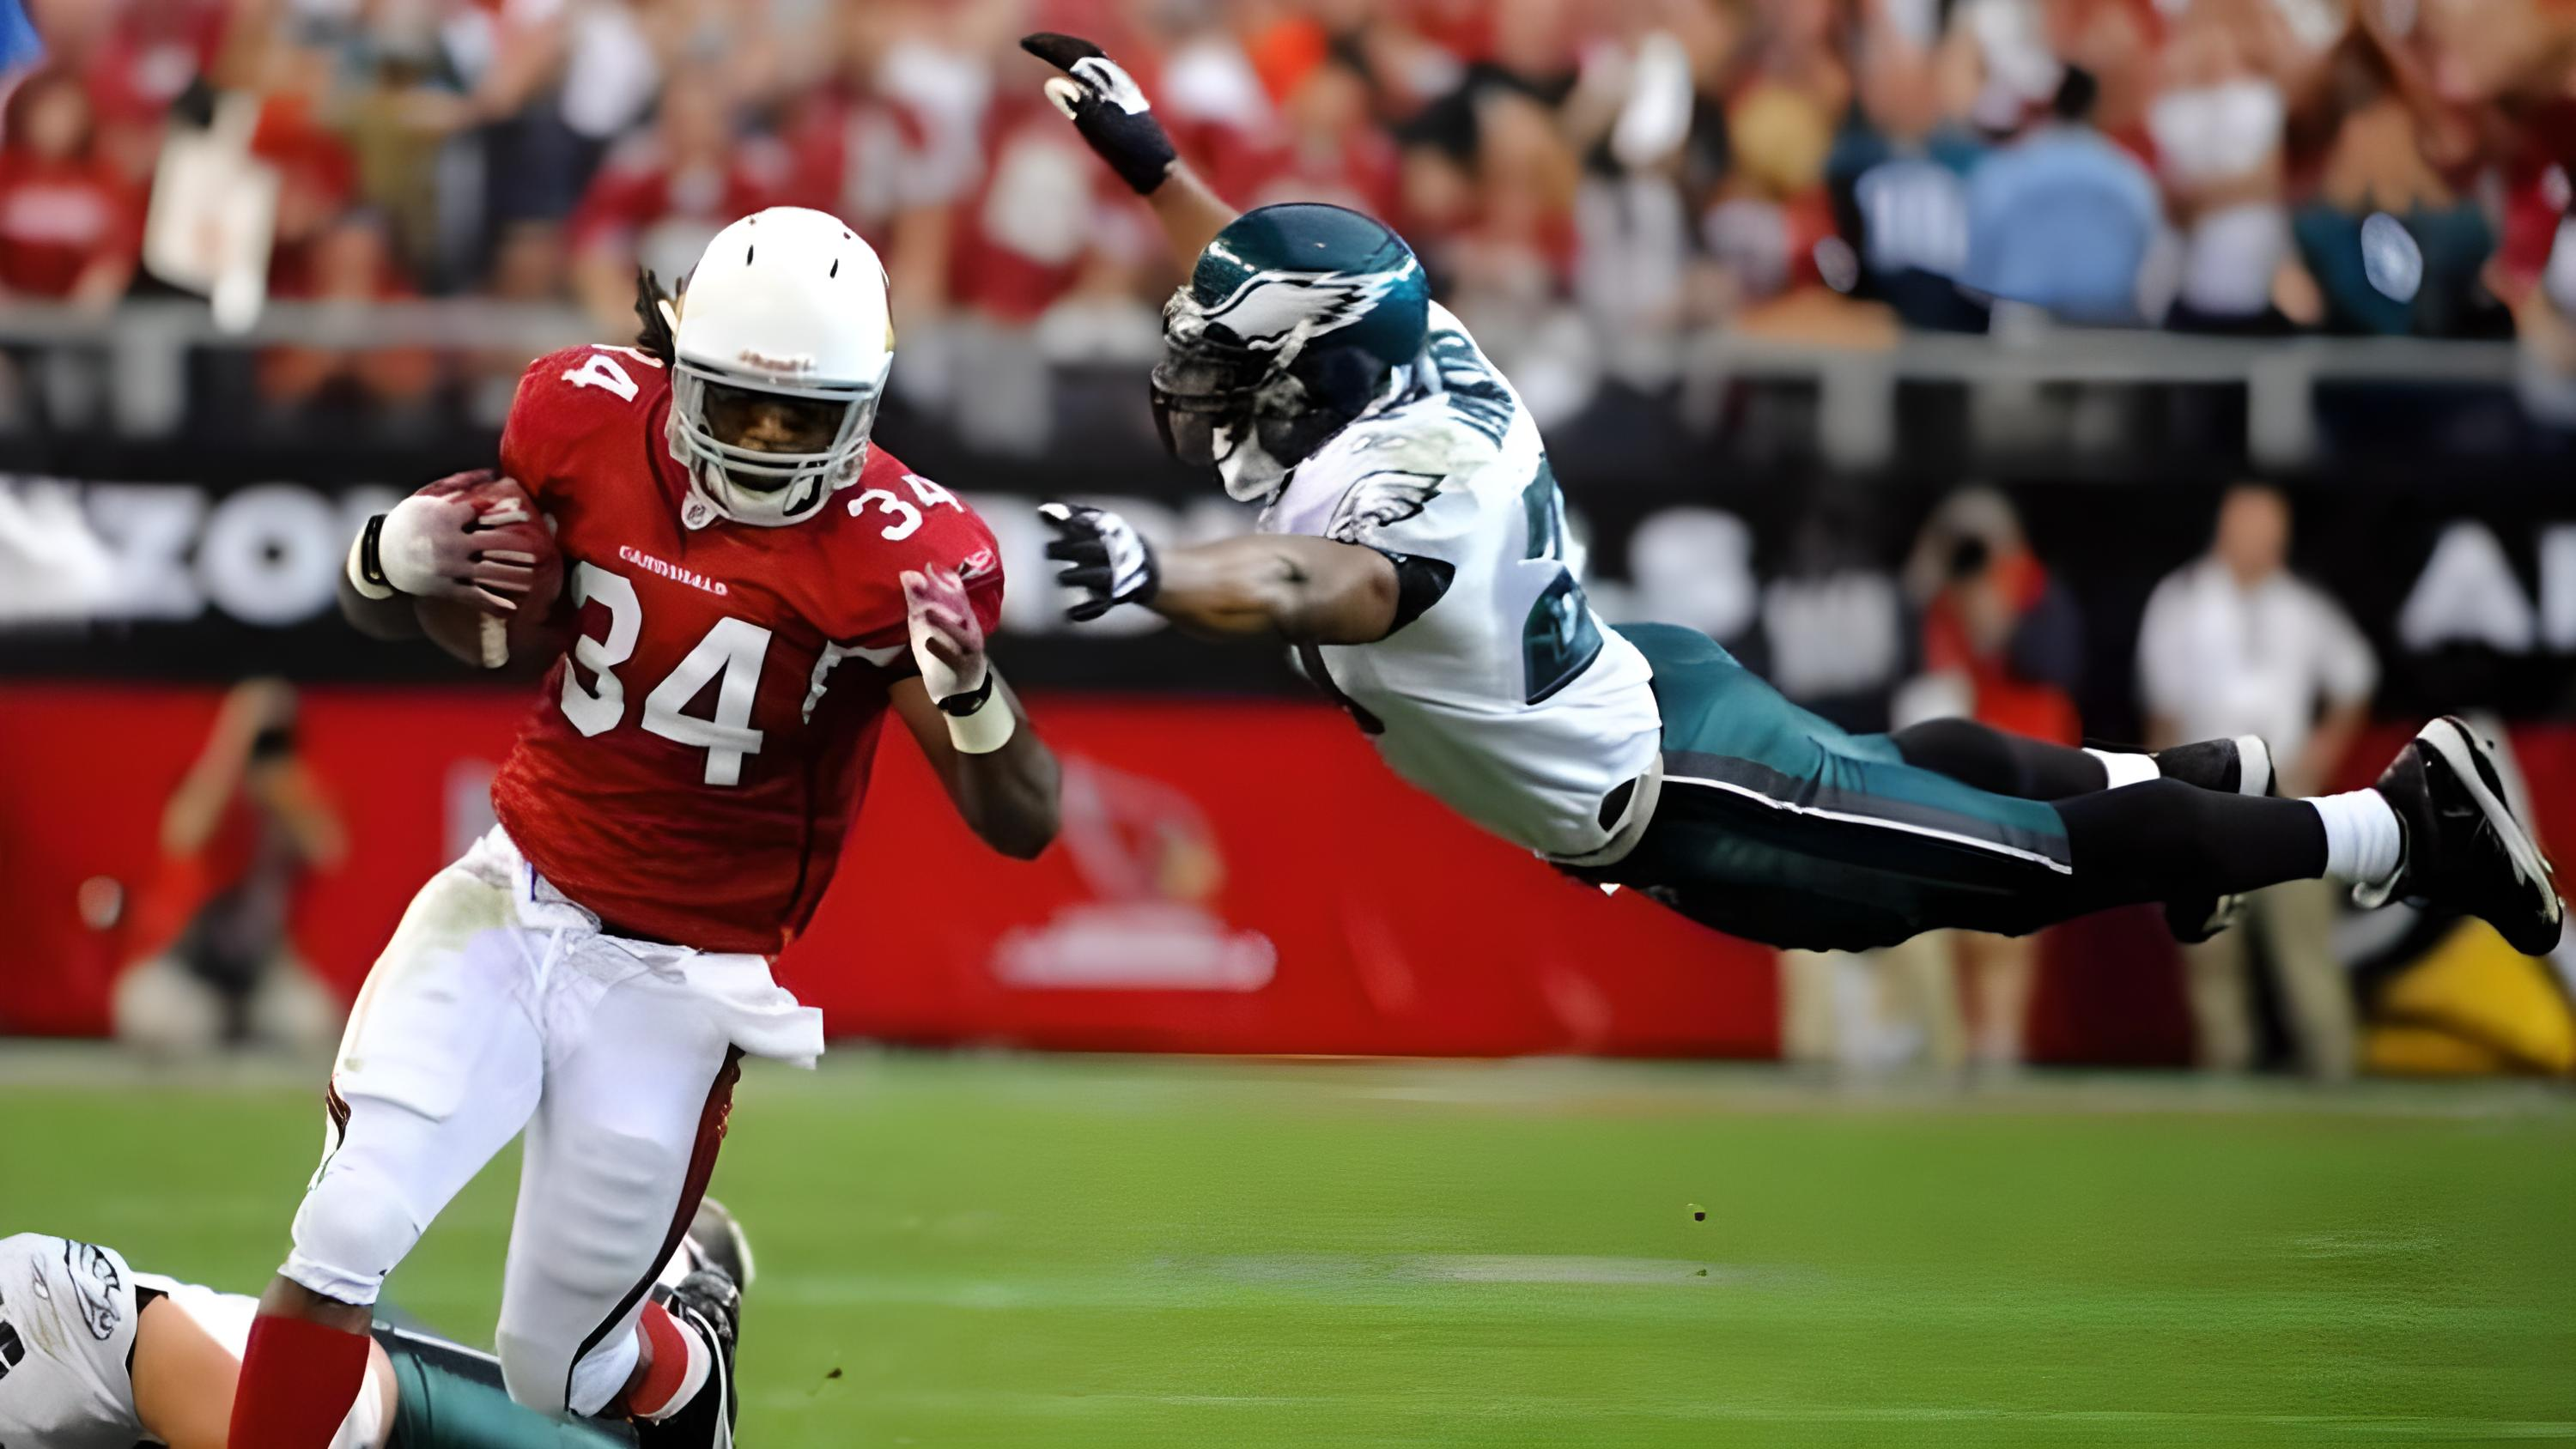

## <a id='1'> *ÍNDICE:* </a>
---
- [1. Introducción:](#3)
    - [1.1. Hipótesis](#11)
    - [1.2. Limpieza de datos](5#)
        - [1.2.1 ](44#)
        - [1.2.3 Visualización](123#)
- [2. Conclusiones](#4)

-----
####  *Contacto*:
*Aquí podrás encontrar mi perfil personal*:
-   [LinkedIn](https://www.linkedin.com/in/ivancorderoc/) ![LinkedIn](/Users/ivanlamb/Desktop/Workspace/eda_nfl/src/img/linkedin.png)

*Para dudas y consultas*:
-   [Gmail](ivan.corderocueva@gmail.com) ![Gmail](/Users/ivanlamb/Desktop/Workspace/eda_nfl/src/img/gmail.png)

*Mi baúl con todos mis proyectos:
-   [GitHub](https://github.com/ivancorderoc) ![GitHub](/Users/ivanlamb/Desktop/Workspace/eda_nfl/src/img/github.png)
-----

# <a id='3'>1. Introducción</a>

#### Este estudio se ha realizado gracias a una libreria dedica a la NFL y a Wikipedia.

La idea fundamental del proyecto es dilucidar si el estar sano influye significativamnete en el éxito de jugador. 
Así como también si a pesar de esas lesiones su grado de desempeño en el campo le permite ser un jugador referente.

 ### <a id='4'> ***1.1 Hipótesis.*** </a>

1.  **¿Cuál es la relación entre lesiones y éxito en la NFL?**
2.  **¿Las consideras lesiones severas son las más habituales?**
3.  **¿Las lesiones leves pueden terminar con la carrera de los profesionales?**    
4.  **¿En qué época de la temporada regular existen más lesiones?**
5.  **¿Cuál es la posición que tiende lesionarse?**
6.  **¿Qué hace la NFL para intentar reducir el número de lesiones para que no acaben con la carrera/vida de los jugadores? *(pregunta a futuro)***


 ### <a id='4'> ***1.1 Limpieza de datos.*** </a>

In [2]:
#Se procede a importar las librerías necesarias:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nfl_data_py as nfl
import seaborn as sns
import warnings
import os
from scipy.stats import chi2_contingency
warnings.filterwarnings("ignore") #Evitamos los errores

Limpieza del primer Dataset.

In [3]:
#Asignamos los datos a los dataframes con los que vamos a trabajar.
rank_10 = pd.read_csv("/Users/ivanlamb/Desktop/Workspace/eda_nfl/src/data/raw/Rank_nfl_2010.csv")
rank_11 = pd.read_csv("/Users/ivanlamb/Desktop/Workspace/eda_nfl/src/data/raw/Rank_nfl_2011.csv")
rank_12 = pd.read_csv("/Users/ivanlamb/Desktop/Workspace/eda_nfl/src/data/raw/Rank_nfl_2012.csv")
rank_13 = pd.read_csv("/Users/ivanlamb/Desktop/Workspace/eda_nfl/src/data/raw/Rank_nfl_2013.csv")
rank_14 = pd.read_csv("/Users/ivanlamb/Desktop/Workspace/eda_nfl/src/data/raw/Rank_nfl_2014.csv")
rank_15 = pd.read_csv("/Users/ivanlamb/Desktop/Workspace/eda_nfl/src/data/raw/Rank_nfl_2015.csv")
rank_16 = pd.read_csv("/Users/ivanlamb/Desktop/Workspace/eda_nfl/src/data/raw/Rank_nfl_2016.csv")
rank_17 = pd.read_csv("/Users/ivanlamb/Desktop/Workspace/eda_nfl/src/data/raw/Rank_nfl_2017.csv")
rank_18 = pd.read_csv("/Users/ivanlamb/Desktop/Workspace/eda_nfl/src/data/raw/Rank_nfl_2018.csv")
rank_19 = pd.read_csv("/Users/ivanlamb/Desktop/Workspace/eda_nfl/src/data/raw/Rank_nfl_2019.csv")
injuries = nfl.import_injuries([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])


In [4]:
# Exportamos nuestro cvs de injuries
injuries.to_csv("injuries.csv", index = False)

In [5]:
# Al tener varios csv relacionados vemos el primero y último
rank_10.head(5)

,Rank,Player,Position,2010 Team,2011 Team,Reference
0,1,Tom Brady,Quarterback,New England Patriots,NaN,1.0
1,2,Peyton Manning,Quarterback,Indianapolis Colts,NaN,2.0
2,3,Adrian Peterson,Running back,Minnesota Vikings,NaN,3.0
3,4,Ray Lewis,Linebacker,Baltimore Ravens,NaN,4.0
4,5,Ed Reed,Safety,Baltimore Ravens,NaN,5.0


In [6]:
# Lo hacemos con el último csv relacionado
rank_19.head(5)

,Rank,Player,Position,2019 team,2020 team,Rank change,Reference,Year accomplishments
0,1,Lamar Jackson,Quarterback,Baltimore Ravens,NaN,NR,[1],- AP MVP\n - 1st Pro Bowl selection\n - 1s...
1,2,Russell Wilson,Quarterback,Seattle Seahawks,NaN,23,[2],- 7th Pro Bowl selection\n - 1st Second-team...
2,3,Aaron Donald,Defensive tackle,Los Angeles Rams,NaN,2,[3],- 6th Pro Bowl selection\n - 5th First-team ...
3,4,Patrick Mahomes,Quarterback,Kansas City Chiefs,NaN,0,[4],- Super Bowl LIVMVP\n - Super Bowl champion ...
4,5,Michael Thomas,Wide receiver,New Orleans Saints,NaN,8,[5],- AP OPOY\n - 2nd First-team All-Pro selecti...


In [7]:
rank_11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rank         100 non-null    int64 
 1   Player       100 non-null    object
 2   Position     100 non-null    object
 3   2011 Team    100 non-null    object
 4   2012 Team    5 non-null      object
 5   Rank Change  100 non-null    object
 6   Reference    100 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 5.6+ KB


In [8]:
rank_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Rank                  100 non-null    int64 
 1   Player                100 non-null    object
 2   Position              100 non-null    object
 3   2018 team             100 non-null    object
 4   2019 team             10 non-null     object
 5   Rank change           100 non-null    object
 6   Reference             100 non-null    object
 7   Year accomplishments  86 non-null     object
dtypes: int64(1), object(7)
memory usage: 6.4+ KB


In [9]:
# Asignamos una nueva columna llamada "Year" en cada dataset de los rankings

rank_10 = rank_10.assign(Year = 2010.0)
rank_11 = rank_11.assign(Year = 2011.0)
rank_12 = rank_12.assign(Year = 2012.0)
rank_13 = rank_13.assign(Year = 2013.0)
rank_14 = rank_14.assign(Year = 2014.0)
rank_15 = rank_15.assign(Year = 2015.0)
rank_16 = rank_16.assign(Year = 2016.0)
rank_17 = rank_17.assign(Year = 2017.0)
rank_18 = rank_18.assign(Year = 2018.0)
rank_19 = rank_19.assign(Year = 2019.0)

In [10]:
# Creamos una lista con todos los datasets de los rankings para luego agregarlo todo a una lista vacia y proceder a crear un Dataset con nuevo indice llamado "ranks_nfl"

ranks_10_19 = [rank_10, 
               rank_11,
               rank_12,
               rank_13,
               rank_14,
               rank_15, 
               rank_16,
               rank_17,
               rank_18,
               rank_19,]

list_data = []
  
for i in ranks_10_19:
    data = (i)
    list_data.append(data)
 
ranks_nfl = pd.concat(list_data,ignore_index=True)

In [11]:
ranks_nfl.to_csv("ranks_nfl.csv", index = False)

In [21]:
# Vemos la informacion que nos da el primer dataset
injuries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51119 entries, 0 to 5391
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   season                     51119 non-null  float64       
 1   game_type                  51119 non-null  object        
 2   team                       51119 non-null  object        
 3   week                       51119 non-null  float64       
 4   gsis_id                    51119 non-null  object        
 5   position                   51119 non-null  object        
 6   full_name                  51119 non-null  object        
 7   first_name                 51119 non-null  object        
 8   last_name                  51119 non-null  object        
 9   report_primary_injury      39778 non-null  object        
 10  report_secondary_injury    2145 non-null   object        
 11  report_status              39778 non-null  object        
 12  pract

In [13]:
# Hacemos una primera visualización de nuestro primer dataframe
injuries.head(5)

,season,game_type,team,week,gsis_id,position,full_name,first_name,last_name,report_primary_injury,report_secondary_injury,report_status,practice_primary_injury,practice_secondary_injury,practice_status,date_modified
0,2010.0,REG,ARI,1.0,00-0027007,RB,Chris Wells,Chris,Wells,Knee,None,Questionable,Knee,None,Did Not Participate In Practice,2010-09-10 12:13:53
1,2010.0,REG,ARI,1.0,00-0022288,RB,Jason Wright,Jason,Wright,Toe,None,Questionable,Toe,None,Limited Participation in Practice,2010-09-10 12:13:44
2,2010.0,REG,ARI,1.0,00-0025668,CB,Michael Adams,Michael,Adams,Shoulder,None,Probable,Shoulder,None,Full Participation in Practice,NaT
3,2010.0,REG,ARI,1.0,00-0026939,LB,Will Davis,Will,Davis,Knee,None,Probable,Knee,None,Full Participation in Practice,NaT
4,2010.0,REG,ARI,1.0,00-0022921,WR,Larry Fitzgerald,Larry,Fitzgerald,Knee,None,Probable,Knee,None,Full Participation in Practice,NaT


,Rank,Player,Position,2010 Team,2011 Team,Reference,Year,2012 Team,Rank Change,2013 Team,2014 Team,2015 Team,2015 team,2016 team,Rank change,2017 team,Year accomplishments,2018 team,2019 team,2020 team
0,1,Tom Brady,Quarterback,New England Patriots,NaN,1.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Peyton Manning,Quarterback,Indianapolis Colts,NaN,2.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Adrian Peterson,Running back,Minnesota Vikings,NaN,3.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Ray Lewis,Linebacker,Baltimore Ravens,NaN,4.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Ed Reed,Safety,Baltimore Ravens,NaN,5.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,96,Chris Carson,Running back,NaN,NaN,[96],2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NR,NaN,"- 2nd consecutive season with 1,150+ rushing y...",NaN,Seattle Seahawks,NaN
996,97,Budda Baker,Safety,NaN,NaN,[97],2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NR,NaN,- Leading tackler amongst safeties (147)\n -...,NaN,Arizona Cardinals,NaN
997,98,Brandon Brooks,Guard,NaN,NaN,[98],2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NR,NaN,- 3rd consecutive Pro Bowl selection,NaN,Philadelphia Eagles,NaN
998,99,Darren Waller,Tight end,NaN,NaN,[99],2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NR,NaN,- 2nd most receiving yards amongst tight ends ...,NaN,Oakland / Las Vegas Raiders,NaN


In [ ]:
#Elimanos todas las columnas inecesarias y con un reindex organizamos nuestro dataset al que en comentarios llamaremos dataset_1

ranks_nfl = ranks_nfl.reindex(columns=["Rank", "Player", "Position", "Year"])

In [ ]:
ranks_nfl["Position"].value_counts()

Wide receiver         165
Quarterback           140
Linebacker            123
Running back          108
Defensive end         106
Cornerback             78
Defensive tackle       61
Safety                 56
Tight end              54
Offensive tackle       46
Guard                  25
Center                 12
Outside linebacker     11
Free safety             5
Fullback                3
Offensive Tackle        3
Kicker                  1
Defensive Tackle        1
Wide Receiver           1
Strong safety           1
Name: Position, dtype: int64

In [ ]:
#aqui podria ir viendo una pequeña visualizacion


In [ ]:
# Cambiamos los nombres en nuestra columna "Position" dentro del dataset_1

ranks_nfl["Position"].replace({"Wide Receiver":"Wide receiver",
                              "Fullback":"Running back",
                              "Strong safety":"Safety",
                              "Free safety":"Safety",
                              "Outside linebacker":"Linebacker",
                              "Offensive Tackle" :"Offensive tackle",
                              "Defensive Tackle":"Defensive tackle"}, inplace=True)

In [ ]:
# Hacemos info sobre nuestro dataset_1 ya tratado
ranks_nfl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rank      1000 non-null   int64  
 1   Player    1000 non-null   object 
 2   Position  1000 non-null   object 
 3   Year      1000 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 31.4+ KB


Una vez dejado el primero a nuestro gusto. Procedemos con el segundo

In [ ]:
# Procedemos a cambiar eliminar columnas y de paso cambiamos varios nombres del dataset_2
injuries.drop(columns=["gsis_id", 
                       "first_name",
                       "last_name",
                       "report_secondary_injury",
                       "practice_secondary_injury",
                       "date_modified"],
              inplace=True)
injuries.rename(columns={'season':'Year',
                         'game_type':'Season',
                         'team':'Team',
                         'position':'Position',
                         'full_name': 'Player',
                         'week': 'Week'},
                inplace=True)

In [ ]:
injuries["Week"].value_counts()

15.0    3245
14.0    3228
16.0    3199
13.0    3195
17.0    3191
12.0    3089
6.0     2988
3.0     2974
4.0     2940
5.0     2869
7.0     2832
11.0    2787
10.0    2741
8.0     2728
9.0     2667
2.0     2491
1.0     2048
18.0     761
19.0     702
20.0     332
21.0     112
Name: Week, dtype: int64

In [ ]:
injuries[injuries["Week"]== 1 ]

,Year,Season,Team,Week,Position,Player,report_primary_injury,report_status,practice_primary_injury,practice_status
0,2010.0,REG,ARI,1.0,RB,Chris Wells,Knee,Questionable,Knee,Did Not Participate In Practice
1,2010.0,REG,ARI,1.0,RB,Jason Wright,Toe,Questionable,Toe,Limited Participation in Practice
2,2010.0,REG,ARI,1.0,CB,Michael Adams,Shoulder,Probable,Shoulder,Full Participation in Practice
3,2010.0,REG,ARI,1.0,LB,Will Davis,Knee,Probable,Knee,Full Participation in Practice
4,2010.0,REG,ARI,1.0,WR,Larry Fitzgerald,Knee,Probable,Knee,Full Participation in Practice
...,...,...,...,...,...,...,...,...,...,...
209,2019.0,REG,WAS,1.0,QB,Colt McCoy,Fibula,Out,Fibula,Did Not Participate In Practice
210,2019.0,REG,WAS,1.0,CB,Fabian Moreau,Ankle,Out,Ankle,Did Not Participate In Practice
211,2019.0,REG,WAS,1.0,DE,Caleb Brantley,Foot,Questionable,Foot,Full Participation in Practice
212,2019.0,REG,WAS,1.0,LB,Cassanova McKinzy,Concussion,Questionable,Concussion,Full Participation in Practice


In [ ]:
#Depuramos nuestro dataset_2 ajustandolo a nuestros parametros

injuries.dropna(inplace=True)
injuries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39733 entries, 0 to 5384
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     39733 non-null  float64
 1   Season                   39733 non-null  object 
 2   Team                     39733 non-null  object 
 3   Week                     39733 non-null  float64
 4   Position                 39733 non-null  object 
 5   Player                   39733 non-null  object 
 6   report_primary_injury    39733 non-null  object 
 7   report_status            39733 non-null  object 
 8   practice_primary_injury  39733 non-null  object 
 9   practice_status          39733 non-null  object 
dtypes: float64(2), object(8)
memory usage: 3.3+ MB


In [ ]:
# DENTRO DE PRACTRICE STATUS ME QUEDO CON OPCIONES DE LESIONES
injuries = injuries.loc[(injuries["practice_status"]== injuries["practice_status"].unique()[0]) | (injuries["practice_status"]== injuries["practice_status"].unique()[-1]) ]


In [ ]:
injuries.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13050 entries, 0 to 5346
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     13050 non-null  float64
 1   Season                   13050 non-null  object 
 2   Team                     13050 non-null  object 
 3   Week                     13050 non-null  float64
 4   Position                 13050 non-null  object 
 5   Player                   13050 non-null  object 
 6   report_primary_injury    13050 non-null  object 
 7   report_status            13050 non-null  object 
 8   practice_primary_injury  13050 non-null  object 
 9   practice_status          13050 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.1+ MB


In [ ]:
# Reducimos el dataset_2

injuries = injuries[injuries["Season"].str.contains("REG")]

# injuries = injuries[injuries["practice_status"].str.contains("Did Not Participate In Practice", "Out (Definitely Will Not Play)")] #Preguntar chicos como hacer para sacar dos valores
# injuries = injuries[injuries["report_status"].str.contains("Out")]

# injuries.reset_index(drop=True, inplace=True) UTIL AQUÍ?

In [ ]:
injuries["Week"].value_counts()

3.0     849
5.0     840
4.0     826
13.0    804
6.0     796
7.0     796
14.0    794
17.0    785
12.0    779
15.0    778
11.0    723
8.0     716
2.0     708
10.0    698
9.0     693
16.0    682
1.0     544
Name: Week, dtype: int64

In [ ]:

# Cambiamos los nombres en nuestra columna "Position" dentro del dataset_2
injuries["Position"].replace({"LB":"Linebacker",
                              "WR":"Wide receiver",
                              "CB":"Cornerback",
                              "RB":"Running back",
                              "S":"Safety",
                              "DE":"Defense end",
                              "T":"Offensive tackle",
                              "DT":"Defensive tackle",
                              "TE": "Tight end",
                              "G": "Guard",
                              "QB":"Quarterback",
                              "C": "Center",
                              "K": "Kicker",
                              "P": "Punter",
                              "LS":"Long snapper",
                              "KR": "Kicker returner",
                              "PR":"Punt returner",}, inplace=True)


In [ ]:
injuries["report_primary_injury"].unique()

array(['Knee', 'Shoulder', 'Back', 'Foot', 'Hamstring', 'Chest', 'Ankle',
       'Head', 'Groin', 'Forearm', 'Abdomen', 'Neck', 'Achilles',
       'Lacerated Kidney', 'Fibula', 'Toe', 'Elbow', 'Hip', 'Thigh',
       'right Shoulder', 'Illness', 'Rib', 'Biceps', 'Not Injury Related',
       'Concussion', 'Quadricep', 'Stinger', '(Migraines)', 'Hand',
       'Shin', 'Calf', 'Migraines', 'Finger', 'migraines', 'Wrist',
       'Glute', 'right Calf', 'Ribs', 'Nose', 'right Hamstring',
       'right Groin', '(migraines)', 'Pelvis', 'Heel', 'left Shoulder',
       'left Forearm', 'Triceps', 'right Knee', 'Pectoral', 'Thumb',
       'Arch', 'Lower Leg', 'right Finger', 'left Hamstring', 'Flu',
       'Tricep', 'right Hip', 'Tibia', 'Kidney', 'Eye', 'Infection',
       'Feet', 'Collarbone', 'Stomach', 'right Quadricep', 'right Hand',
       'right Thumb', 'left Calf', 'rt. thumb', 'left Groin', 'Jaw',
       'left Knee', 'Oblique', 'Right Shoulder', 'Tailbone', 'Throat',
       'Upper Arm', 'To

In [ ]:
# injuries["report_primary_injury"].replace({"Ribs / Shoulder / Illness":"Multiple"},inplace = True)

In [ ]:
injuries["report_primary_injury"].replace({"left Shoulder":"Shoulder",
                                   "right Shoulder":"Shoulder",
                                   "Right Shoulder":"Shoulder",
                                   "migraines":"Migraines",
                                   "(migraines)":"Migraines",
                                   "left Groin":"Groin",
                                   "right Groin":"Groin",
                                   "left Forearm":"Forearm",
                                   "right Knee":"Knee",
                                   "left Knee":"Knee",
                                   "right Finger":"Finger",
                                   "right hip":"Hip",
                                   "Quadricep":"Quadriceps",
                                   "right Quadricep":"Quadriceps",
                                   "rt. thumb":"Thumb",
                                   "right Thumb":"Thumb",
                                   "left Calf": "Calf",
                                   "right Calf": "Calf",
                                   "groin, knee, ankle": "Multiple",
                                   "Shoulder, Finger": "Multiple",
                                   "Bicep":"Biceps",
                                   "right Elbow": "Elbow",
                                   "Core": "Core Muscle",
                                   "Core Muscle Injury": "Core Muscle",
                                   "Right Collarbone": "Collarbone",
                                   "Medical Illness":"Illness",
                                   "left Wrist": "Wrist",
                                   "right Hamstring":"Hamstring",
                                   "Triceps":"Triceps",
                                   "right Hip":"Hip",}, inplace=True)


injuries["practice_primary_injury"].replace({"left Shoulder":"Shoulder",
                                   "right Shoulder":"Shoulder",
                                   "Right Shoulder":"Shoulder",
                                   "migraines":"Migraines",
                                   "(migraines)":"Migraines",
                                   "left Groin":"Groin",
                                   "right Groin":"Groin",
                                   "left Forearm":"Forearm",
                                   "right Knee":"Knee",
                                   "left Knee":"Knee",
                                   "right Finger":"Finger",
                                   "right hip":"Hip",
                                   "Quadricep":"Quadriceps",
                                   "right Quadricep":"Quadriceps",
                                   "rt. thumb":"Thumb",
                                   "right Thumb":"Thumb",
                                   "left Calf": "Calf",
                                   "right Calf": "Calf",
                                   "groin, knee, ankle": "Multiple",
                                   "Shoulder, Finger": "Multiple",
                                   "Bicep":"Biceps",
                                   "right Elbow": "Elbow",
                                   "Core": "Core Muscle",
                                   "Core Muscle Injury": "Core Muscle",
                                   "Right Collarbone": "Collarbone",
                                   "Medical Illness":"Illness",
                                   "left Wrist": "Wrist",
                                   "right Hamstring":"Hamstring",
                                   "Triceps":"Triceps",
                                   "right Hip":"Hip",
                                   "oblique": "Oblique"}, inplace=True)

In [ ]:
injuries

,Year,Season,Team,Week,Position,Player,report_primary_injury,report_status,practice_primary_injury,practice_status
0,2010.0,REG,ARI,1.0,Running back,Chris Wells,Knee,Questionable,Knee,Did Not Participate In Practice
8,2010.0,REG,ATL,1.0,Wide receiver,Michael Jenkins,Shoulder,Out,Shoulder,Did Not Participate In Practice
12,2010.0,REG,BAL,1.0,Defensive tackle,Terrence Cody,Knee,Out,Knee,Out (Definitely Will Not Play)
13,2010.0,REG,BAL,1.0,Offensive tackle,Jared Gaither,Back,Out,Back,Out (Definitely Will Not Play)
14,2010.0,REG,BAL,1.0,Wide receiver,Donte' Stallworth,Foot,Out,Foot,Out (Definitely Will Not Play)
...,...,...,...,...,...,...,...,...,...,...
5196,2019.0,REG,WAS,17.0,Safety,Landon Collins,Shoulder,Out,Shoulder,Did Not Participate In Practice
5197,2019.0,REG,WAS,17.0,Quarterback,Dwayne Haskins,Ankle,Out,Ankle,Did Not Participate In Practice
5198,2019.0,REG,WAS,17.0,Wide receiver,Terry McLaurin,Concussion,Out,Concussion,Did Not Participate In Practice
5199,2019.0,REG,WAS,17.0,Safety,Troy Apke,Knee,Questionable,Knee,Did Not Participate In Practice


In [ ]:
# RESET DE INDEX PORQUE TENIA INDEX REPETIDO
injuries.reset_index(drop=True, inplace=True)

In [ ]:
injuries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12811 entries, 0 to 12810
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     12811 non-null  float64
 1   Season                   12811 non-null  object 
 2   Team                     12811 non-null  object 
 3   Week                     12811 non-null  float64
 4   Position                 12811 non-null  object 
 5   Player                   12811 non-null  object 
 6   report_primary_injury    12811 non-null  object 
 7   report_status            12811 non-null  object 
 8   practice_primary_injury  12811 non-null  object 
 9   practice_status          12811 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1001.0+ KB


In [ ]:
injuries["Player"].value_counts()

Eddie Royal        33
Louis Delmas       31
Jordan Reed        27
Marcus Gilbert     26
A.J. Green         25
                   ..
Bobby Rainey        1
Luther Robinson     1
Jayson DiManche     1
Tramain Jacobs      1
Dwayne Haskins      1
Name: Player, Length: 3118, dtype: int64

In [ ]:
#Analizamos nuestro primer Dataset "ranks_nfl"
ranks_nfl

,Rank,Player,Position,Year
0,1,Tom Brady,Quarterback,2010.0
1,2,Peyton Manning,Quarterback,2010.0
2,3,Adrian Peterson,Running back,2010.0
3,4,Ray Lewis,Linebacker,2010.0
4,5,Ed Reed,Safety,2010.0
...,...,...,...,...
995,96,Chris Carson,Running back,2019.0
996,97,Budda Baker,Safety,2019.0
997,98,Brandon Brooks,Guard,2019.0
998,99,Darren Waller,Tight end,2019.0


In [ ]:
ranks_nfl["Position"].value_counts()

Wide receiver       166
Quarterback         140
Linebacker          134
Running back        111
Defensive end       106
Cornerback           78
Safety               62
Defensive tackle     62
Tight end            54
Offensive tackle     49
Guard                25
Center               12
Kicker                1
Name: Position, dtype: int64

In [ ]:
injuries["Position"].value_counts()

Linebacker          1947
Cornerback          1651
Wide receiver       1615
Running back        1173
Safety              1117
Offensive tackle    1022
Defense end         1011
Tight end            860
Defensive tackle     855
Guard                714
Quarterback          371
Center               336
Kicker                85
Punter                29
Long snapper          21
Kicker returner        3
Punt returner          1
Name: Position, dtype: int64

In [ ]:
injuries["Player"].value_counts()

Eddie Royal        33
Louis Delmas       31
Jordan Reed        27
Marcus Gilbert     26
A.J. Green         25
                   ..
Bobby Rainey        1
Luther Robinson     1
Jayson DiManche     1
Tramain Jacobs      1
Dwayne Haskins      1
Name: Player, Length: 3118, dtype: int64

In [ ]:
injuries[injuries["Player"].str.contains("Julian Edelman")]

,Year,Season,Team,Week,Position,Player,report_primary_injury,report_status,practice_primary_injury,practice_status
1678,2011.0,REG,NE,5.0,Wide receiver,Julian Edelman,Ankle,Doubtful,Ankle,Did Not Participate In Practice
2911,2012.0,REG,NE,4.0,Wide receiver,Julian Edelman,Hand,Out,Hand,Did Not Participate In Practice
2977,2012.0,REG,NE,5.0,Wide receiver,Julian Edelman,Hand,Out,Hand,Did Not Participate In Practice
7278,2015.0,REG,NE,11.0,Wide receiver,Julian Edelman,Foot,Out,Foot,Did Not Participate In Practice
7351,2015.0,REG,NE,12.0,Wide receiver,Julian Edelman,Foot,Out,Foot,Did Not Participate In Practice
7445,2015.0,REG,NE,13.0,Wide receiver,Julian Edelman,Foot,Out,Foot,Did Not Participate In Practice
7773,2015.0,REG,NE,17.0,Wide receiver,Julian Edelman,Foot,Out,Foot,Did Not Participate In Practice


In [ ]:
injuries[injuries["Player"]=="Julian Edelman"]

,Year,Season,Team,Week,Position,Player,report_primary_injury,report_status,practice_primary_injury,practice_status
1678,2011.0,REG,NE,5.0,Wide receiver,Julian Edelman,Ankle,Doubtful,Ankle,Did Not Participate In Practice
2911,2012.0,REG,NE,4.0,Wide receiver,Julian Edelman,Hand,Out,Hand,Did Not Participate In Practice
2977,2012.0,REG,NE,5.0,Wide receiver,Julian Edelman,Hand,Out,Hand,Did Not Participate In Practice
7278,2015.0,REG,NE,11.0,Wide receiver,Julian Edelman,Foot,Out,Foot,Did Not Participate In Practice
7351,2015.0,REG,NE,12.0,Wide receiver,Julian Edelman,Foot,Out,Foot,Did Not Participate In Practice
7445,2015.0,REG,NE,13.0,Wide receiver,Julian Edelman,Foot,Out,Foot,Did Not Participate In Practice
7773,2015.0,REG,NE,17.0,Wide receiver,Julian Edelman,Foot,Out,Foot,Did Not Participate In Practice


In [ ]:
injuries['practice_status'].unique()

array(['Did Not Participate In Practice',
       'Out (Definitely Will Not Play)'], dtype=object)

In [ ]:
injuries['report_status'].unique()

array(['Questionable', 'Out', 'Doubtful', 'Probable'], dtype=object)

In [ ]:
HASTA AQUÍ!
HASTA AQUÍ!

SyntaxError: invalid syntax (3075856316.py, line 1)

In [ ]:
conteo = injuries['report_status'].value_counts(ascending=True)

plt.figure(figsize=(10,5))
plt.hlines(y=conteo.index,
           xmin=140,
           xmax=conteo,
           color='skyblue')
plt.plot(conteo, conteo.index, "o");


In [ ]:
#Calculando con un groupby el numero de veces que aparece un jugador en el DF.
# pd.value_counts(injuries['full_name'].str.contains["Julian Edelman"])
injuries[injuries["Player"].str.contains("Julian Edelman")]

In [ ]:
injuries.to_csv("injuries_manuel.csv", index = False) 

In [ ]:
injuries.plot('Year',injuries['Position'].count())

IndexError: index 12811 is out of bounds for axis 0 with size 10

In [ ]:
cross_tab = pd.crosstab(index = injuries.Year, columns=injuries.Position)
cross_tab_matrix = np.array(cross_tab)

In [ ]:
cross_tab.iloc[0]

In [ ]:
cross_tab.median()

In [ ]:
sns.countplot(cross_tab, figzise)

In [ ]:
cross_tab.iloc[0].plot(kind= "bar",title="injuries by Position 2010");


In [ ]:
cross_tab.iloc[0]

In [ ]:
cross_tab.plot();

plano general de las lesiones anualmente 

In [ ]:
cross_tab.value_counts()

In [ ]:
# Realizar la prueba chi-cuadrado
estadistico, p_valor, grados_libertad, esperados = chi2_contingency(cross_tab_matrix)

# Mostrar los resultados
print("Estadístico chi-cuadrado:", estadistico)
print("Valor p:", p_valor)
print("Grados de libertad:", grados_libertad)
print("Tabla de frecuencias esperadas:\n", esperados)

In [ ]:
# Seleccionamos el grado de significancia
alpha = 0.05

# Evaluación de p-valor en función del nivel de significación elegido
if p_valor < alpha:
    print("Rechazar la hipótesis nula: no hay diferencia significativa entre las frecuencias esperadas y las observadas en las tablas de contingencia.")
else:
    print("No se puede rechazar la hipótesis nula: no hay diferencia significativa entre las frecuencias esperadas y las observadas en las tablas de contingencia.")


In [ ]:
sns.displot(ranks_nfl["Position"], kde=True)

In [ ]:
#Filtro() de todos los repetidos(para comprobar)
injuries.boxplot(ax=)

##### ***3. Fuentes***<a id='4'></a>
- Datasets: injuries: [Libreria NFL]("https://pypi.org/project/nfl-data-py/"), [Wikipedia]("https://en.wikipedia.org/wiki/NFL_Top_100")

## <a href ='#0'> 🔝 To the moon 🔝 </a>